## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap SVC discovery scan (aggressive)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/user/notebooks/pcaps/nmap_svc_discovery_aggressive'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [4]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.055133
Name: time, dtype: float64

In [5]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [6]:
scan_times
#duration_list

0    0.055133
1    0.056277
2    0.066185
3    0.107614
4    0.054889
5    0.060613
6    1.447001
7    0.056013
8    0.076941
9    0.055402
Name: Scan times, dtype: float64

In [7]:
temp = pd.DataFrame(duration_list)

In [35]:
temp

,0
0,0.055133
1,0.056277
2,0.066185
3,0.107614
4,0.054889
5,0.060613
6,1.447001
7,0.056013
8,0.076941
9,0.055402


In [8]:
temp.mean()

0    0.203607
dtype: float64

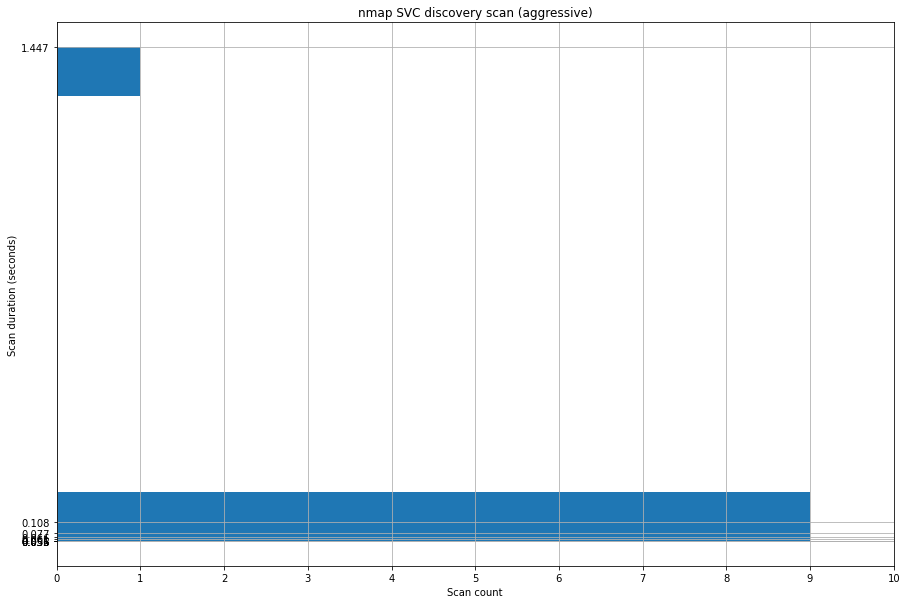

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.203607
std,0.437193
min,0.054889
25%,0.055555
50%,0.058445
75%,0.074252
max,1.447001


In [41]:
for scan in scan_list:
    print(scan['ip_proto'])

0       6
1       6
2       6
3       6
4       6
       ..
1995    6
1996    6
1997    6
1998    6
1999    6
Name: ip_proto, Length: 2000, dtype: int64
0       6
1       6
2       6
3       6
4       6
       ..
1995    6
1996    6
1997    6
1998    6
1999    6
Name: ip_proto, Length: 2000, dtype: int64
0       6
1       6
2       6
3       6
4       6
       ..
1995    6
1996    6
1997    6
1998    6
1999    6
Name: ip_proto, Length: 2000, dtype: int64
0       6
1       6
2       6
3       6
4       6
       ..
1995    6
1996    6
1997    6
1998    6
1999    6
Name: ip_proto, Length: 2000, dtype: int64
0       6
1       6
2       6
3       6
4       6
       ..
1995    6
1996    6
1997    6
1998    6
1999    6
Name: ip_proto, Length: 2000, dtype: int64
0       6
1       6
2       6
3       6
4       6
       ..
1995    6
1996    6
1997    6
1998    6
1999    6
Name: ip_proto, Length: 2000, dtype: int64
0       6
1       6
2       6
3       6
4       6
       ..
1995    6
1996    6
19

## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 4072.136402130127



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 62598 21
2 62598 256
3 62598 443
4 62598 1723
5 62598 111
6 62598 587
7 62598 22
8 62598 995
9 62598 110
10 62598 25
11 62598 1720
12 62598 5900
13 62598 8080
14 62598 53
15 62598 23
16 62598 135
17 62598 554
18 62598 445
19 62598 199
20 62598 3389
21 62598 139
22 62598 1025
23 62598 113
24 62598 993
25 62598 143
26 62598 80
27 62598 3306
28 62598 8888
29 62598 5440
30 62598 1035
31 62598 49176
32 62598 1114
33 62598 9500
34 62598 70
35 62598 56737
36 62598 2557
37 62598 2910
38 62598 5357
39 62598 1840
40 62598 8383
41 62598 32777
42 62598 6566
43 62598 3000
44 62598 5802
45 62598 6003
46 62598 9
47 62598 5431
48 62598 32782
49 62598 9290
50 62598 8292
51 62598 16012
52 62598 5298
53 62598 6667
54 62598 8086
55 62598 5555
56 62598 3128
57 62598 1081
58 62598 7778
59 62598 55555
60 62598 2020
61 62598 9011
62 62598 458
63 62598 8180
64 62598 42510
65 62598 10012
66 62598 1079
67 62598 119
68 62598 49159
69 62598 5000
70 62598 1032
71 62598 425
72 62598 99
73 62598 3826
74 62598 8994


622 62598 3077
623 62598 6002
624 62598 1121
625 62598 5718
626 62598 24444
627 62598 8085
628 62598 3
629 62598 1036
630 62598 8031
631 62598 4005
632 62598 9080
633 62598 17877
634 62598 902
635 62598 2967
636 62598 1186
637 62598 14000
638 62598 9503
639 62598 18040
640 62598 691
641 62598 3659
642 62598 3945
643 62598 49167
644 62598 50002
645 62598 301
646 62598 2043
647 62598 52673
648 62598 2105
649 62598 1068
650 62598 2009
651 62598 1011
652 62598 1719
653 62598 515
654 62598 10626
655 62598 9111
656 62598 1658
657 62598 1023
658 62598 1098
659 62598 2107
660 62598 64623
661 62598 2366
662 62598 7496
663 62598 1971
664 62598 7019
665 62598 32771
666 62598 20005
667 62598 32773
668 62598 2045
669 62598 465
670 62598 1494
671 62598 5903
672 62598 12174
673 62598 5087
674 62598 1233
675 62598 8193
676 62598 33899
677 62598 5051
678 62598 7676
679 62598 5911
680 62598 5801
681 62598 49155
682 62598 6901
683 62598 1107
684 62598 1721
685 62598 50001
686 62598 2038
687 62598 481
688

772 36535 6346
773 36535 801
774 36535 1165
775 36535 19350
776 36535 8090
777 36535 5431
778 36535 1503
779 36535 19842
780 36535 3371
781 36535 691
782 36535 13
783 36535 1149
784 36535 52869
785 36535 7025
786 36535 50636
787 36535 2038
788 36535 4045
789 36535 6543
790 36535 22939
791 36535 3367
792 36535 4242
793 36535 32782
794 36535 8089
795 36535 1091
796 36535 3300
797 36535 6666
798 36535 1081
799 36535 5357
800 36535 1233
801 36535 1984
802 36535 119
803 36535 31038
804 36535 4900
805 36535 1037
806 36535 6009
807 36535 648
808 36535 5100
809 36535 7002
810 36535 6502
811 36535 56737
812 36535 1717
813 36535 9929
814 36535 18040
815 36535 1030
816 36535 2135
817 36535 10002
818 36535 8200
819 36535 2608
820 36535 10010
821 36535 7921
822 36535 9618
823 36535 1755
824 36535 10009
825 36535 1198
826 36535 2103
827 36535 31337
828 36535 1092
829 36535 1138
830 36535 7920
831 36535 8010
832 36535 3260
833 36535 52822
834 36535 2381
835 36535 2001
836 36535 2492
837 36535 2000
83

955 37155 27715
956 37155 1106
957 37155 23502
958 37155 5915
959 37155 720
960 37155 1236
961 37155 726
962 37155 1334
963 37155 1073
964 37155 5102
965 37155 1494
966 37155 12345
967 37155 10000
968 37155 4343
969 37155 1111
970 37155 5801
971 37155 2191
972 37155 10004
973 37155 3371
974 37155 3077
975 37155 26
976 37155 54045
977 37155 6881
978 37155 1075
979 37155 5054
980 37155 3945
981 37155 5998
982 37155 1839
983 37155 714
984 37155 2022
985 37155 3369
986 37155 5952
987 37155 3889
988 37155 49157
989 37155 19801
990 37155 4550
991 37155 765
992 37155 6567
993 37155 9500
994 37155 3324
995 37155 3006
996 37155 1117
997 37155 5962
998 37155 3493
999 37155 18988
1000 37155 7921
1 38834 110
2 38834 8888
3 38834 22
4 38834 8080
5 38834 111
6 38834 3306
7 38834 1720
8 38834 135
9 38834 1025
10 38834 1723
11 38834 23
12 38834 25
13 38834 554
14 38834 199
15 38834 995
16 38834 256
17 38834 993
18 38834 21
19 38834 139
20 38834 53
21 38834 113
22 38834 443
23 38834 445
24 38834 143
25

621 38834 4002
622 38834 2034
623 38834 12265
624 38834 6668
625 38834 50006
626 38834 8089
627 38834 4550
628 38834 163
629 38834 22939
630 38834 1216
631 38834 465
632 38834 10215
633 38834 5510
634 38834 2009
635 38834 1098
636 38834 6025
637 38834 6002
638 38834 6901
639 38834 8194
640 38834 3017
641 38834 10626
642 38834 5000
643 38834 18040
644 38834 58080
645 38834 10628
646 38834 3493
647 38834 5989
648 38834 1111
649 38834 512
650 38834 8873
651 38834 2800
652 38834 49161
653 38834 8021
654 38834 1054
655 38834 10025
656 38834 8652
657 38834 6547
658 38834 2811
659 38834 82
660 38834 6004
661 38834 31337
662 38834 13456
663 38834 6000
664 38834 32768
665 38834 12000
666 38834 6389
667 38834 211
668 38834 1117
669 38834 10629
670 38834 49999
671 38834 4998
672 38834 726
673 38834 5906
674 38834 8009
675 38834 4279
676 38834 1123
677 38834 4446
678 38834 3527
679 38834 416
680 38834 5904
681 38834 1083
682 38834 26214
683 38834 56737
684 38834 1126
685 38834 2020
686 38834 1201


288 35099 2718
289 35099 1862
290 35099 3784
291 35099 3031
292 35099 2608
293 35099 8022
294 35099 50800
295 35099 1580
296 35099 5922
297 35099 13722
298 35099 2251
299 35099 50003
300 35099 3211
301 35099 783
302 35099 1062
303 35099 54328
304 35099 2702
305 35099 667
306 35099 18101
307 35099 5544
308 35099 32779
309 35099 3390
310 35099 61900
311 35099 1216
312 35099 2800
313 35099 545
314 35099 2288
315 35099 1002
316 35099 1501
317 35099 1064
318 35099 497
319 35099 4125
320 35099 3809
321 35099 8083
322 35099 10009
323 35099 666
324 35099 5903
325 35099 3283
326 35099 1010
327 35099 3869
328 35099 9002
329 35099 406
330 35099 8000
331 35099 7001
332 35099 4899
333 35099 2006
334 35099 2099
335 35099 1039
336 35099 20
337 35099 5800
338 35099 10003
339 35099 9099
340 35099 222
341 35099 19283
342 35099 49
343 35099 9050
344 35099 7004
345 35099 1074
346 35099 3000
347 35099 8402
348 35099 2602
349 35099 5822
350 35099 5002
351 35099 720
352 35099 45100
353 35099 2701
354 35099 5

954 35099 1782
955 35099 8290
956 35099 57797
957 35099 1106
958 35099 5952
959 35099 2049
960 35099 1999
961 35099 6699
962 35099 9876
963 35099 513
964 35099 2717
965 35099 8193
966 35099 12345
967 35099 13783
968 35099 1117
969 35099 65389
970 35099 10001
971 35099 9090
972 35099 4848
973 35099 1028
974 35099 1084
975 35099 8500
976 35099 70
977 35099 49155
978 35099 981
979 35099 1082
980 35099 800
981 35099 5555
982 35099 10024
983 35099 3003
984 35099 1048
985 35099 524
986 35099 49400
987 35099 20031
988 35099 1073
989 35099 20222
990 35099 2383
991 35099 8001
992 35099 32776
993 35099 55055
994 35099 1065
995 35099 2910
996 35099 1717
997 35099 1719
998 35099 20828
999 35099 1805
1000 35099 3737
1 51314 113
2 51314 5900
3 51314 143
4 51314 256
5 51314 8888
6 51314 1723
7 51314 135
8 51314 139
9 51314 23
10 51314 199
11 51314 587
12 51314 80
13 51314 8080
14 51314 995
15 51314 993
16 51314 443
17 51314 53
18 51314 554
19 51314 1720
20 51314 25
21 51314 110
22 51314 3389
23 51314

93 61715 7103
94 61715 64623
95 61715 2399
96 61715 3809
97 61715 1641
98 61715 7920
99 61715 7200
100 61715 1104
101 61715 8333
102 61715 8383
103 61715 12000
104 61715 1443
105 61715 4002
106 61715 5051
107 61715 33354
108 61715 2161
109 61715 873
110 61715 3372
111 61715 9050
112 61715 1718
113 61715 42
114 61715 1058
115 61715 3
116 61715 6002
117 61715 1042
118 61715 1216
119 61715 1130
120 61715 1036
121 61715 514
122 61715 8873
123 61715 18988
124 61715 7778
125 61715 5959
126 61715 37
127 61715 1192
128 61715 2003
129 61715 1121
130 61715 50003
131 61715 222
132 61715 3851
133 61715 6699
134 61715 27353
135 61715 6502
136 61715 49176
137 61715 1076
138 61715 30
139 61715 2288
140 61715 19101
141 61715 4129
142 61715 50000
143 61715 4111
144 61715 9877
145 61715 1248
146 61715 389
147 61715 51103
148 61715 1199
149 61715 41511
150 61715 1030
151 61715 2323
152 61715 10617
153 61715 9415
154 61715 21571
155 61715 3766
156 61715 65129
157 61715 987
158 61715 2005
159 61715 10621
1

287 64061 5633
288 64061 5859
289 64061 2001
290 64061 1082
291 64061 6000
292 64061 1036
293 64061 1755
294 64061 6003
295 64061 987
296 64061 5566
297 64061 1009
298 64061 1503
299 64061 2010
300 64061 9876
301 64061 2725
302 64061 50300
303 64061 1061
304 64061 1247
305 64061 458
306 64061 1277
307 64061 2602
308 64061 2190
309 64061 1110
310 64061 61532
311 64061 4
312 64061 8899
313 64061 2105
314 64061 3737
315 64061 1666
316 64061 3013
317 64061 1433
318 64061 7911
319 64061 8649
320 64061 7938
321 64061 9943
322 64061 50002
323 64061 1039
324 64061 43
325 64061 42510
326 64061 3322
327 64061 4445
328 64061 1234
329 64061 9010
330 64061 3986
331 64061 1056
332 64061 6389
333 64061 1080
334 64061 85
335 64061 2006
336 64061 52848
337 64061 1580
338 64061 5989
339 64061 5226
340 64061 60443
341 64061 1166
342 64061 8085
343 64061 5822
344 64061 1130
345 64061 668
346 64061 1093
347 64061 1971
348 64061 1089
349 64061 1
350 64061 8300
351 64061 464
352 64061 1083
353 64061 16000
35

953 64061 5214
954 64061 1085
955 64061 7777
956 64061 7019
957 64061 2007
958 64061 1028
959 64061 109
960 64061 5414
961 64061 1863
962 64061 1138
963 64061 88
964 64061 3517
965 64061 3945
966 64061 1051
967 64061 2065
968 64061 2393
969 64061 1218
970 64061 1164
971 64061 30000
972 64061 2170
973 64061 2920
974 64061 32768
975 64061 1185
976 64061 1122
977 64061 1065
978 64061 1198
979 64061 9090
980 64061 49161
981 64061 5000
982 64061 843
983 64061 1935
984 64061 1864
985 64061 5800
986 64061 32780
987 64061 1137
988 64061 5922
989 64061 23502
990 64061 783
991 64061 5280
992 64061 106
993 64061 1066
994 64061 2500
995 64061 8290
996 64061 8652
997 64061 2394
998 64061 3367
999 64061 30718
1000 64061 2710
1 41747 443
2 41747 135
3 41747 113
4 41747 23
5 41747 21
6 41747 993
7 41747 111
8 41747 110
9 41747 22
10 41747 8080
11 41747 445
12 41747 1723
13 41747 53
14 41747 554
15 41747 8888
16 41747 3306
17 41747 1025
18 41747 143
19 41747 1720
20 41747 3389
21 41747 5900
22 41747 19

620 41747 52822
621 41747 212
622 41747 1455
623 41747 8300
624 41747 800
625 41747 3052
626 41747 49156
627 41747 1091
628 41747 1030
629 41747 9010
630 41747 5910
631 41747 5120
632 41747 6006
633 41747 10616
634 41747 1151
635 41747 6667
636 41747 1074
637 41747 1594
638 41747 2601
639 41747 7496
640 41747 8089
641 41747 1113
642 41747 6668
643 41747 8333
644 41747 21571
645 41747 13456
646 41747 1234
647 41747 64680
648 41747 1058
649 41747 10215
650 41747 3517
651 41747 1501
652 41747 1271
653 41747 5560
654 41747 7921
655 41747 49176
656 41747 70
657 41747 1328
658 41747 2608
659 41747 2119
660 41747 5925
661 41747 20221
662 41747 1244
663 41747 16000
664 41747 1500
665 41747 4279
666 41747 6881
667 41747 10617
668 41747 1065
669 41747 2111
670 41747 1002
671 41747 1935
672 41747 7004
673 41747 1556
674 41747 2811
675 41747 2021
676 41747 5102
677 41747 28201
678 41747 3546
679 41747 389
680 41747 1121
681 41747 30
682 41747 5999
683 41747 2000
684 41747 3945
685 41747 27353
686 

286 39263 6009
287 39263 9535
288 39263 20005
289 39263 8383
290 39263 1309
291 39263 43
292 39263 9011
293 39263 3300
294 39263 3390
295 39263 555
296 39263 4126
297 39263 5002
298 39263 30000
299 39263 2005
300 39263 31337
301 39263 8085
302 39263 19801
303 39263 1049
304 39263 3689
305 39263 8291
306 39263 4567
307 39263 1434
308 39263 726
309 39263 44442
310 39263 873
311 39263 7920
312 39263 616
313 39263 1862
314 39263 4550
315 39263 33354
316 39263 6004
317 39263 20828
318 39263 3322
319 39263 9878
320 39263 5960
321 39263 4446
322 39263 3814
323 39263 16012
324 39263 1053
325 39263 2381
326 39263 55555
327 39263 10024
328 39263 57797
329 39263 50002
330 39263 1801
331 39263 8001
332 39263 61900
333 39263 19315
334 39263 1244
335 39263 714
336 39263 8400
337 39263 5877
338 39263 1900
339 39263 4006
340 39263 82
341 39263 1043
342 39263 16080
343 39263 8292
344 39263 1046
345 39263 2383
346 39263 5414
347 39263 3905
348 39263 2049
349 39263 3168
350 39263 9090
351 39263 4848
352 

953 39263 3527
954 39263 5850
955 39263 9010
956 39263 1090
957 39263 1600
958 39263 8007
959 39263 32773
960 39263 1165
961 39263 2382
962 39263 32772
963 39263 37
964 39263 2522
965 39263 6789
966 39263 4004
967 39263 8181
968 39263 83
969 39263 8193
970 39263 7625
971 39263 18101
972 39263 7741
973 39263 1061
974 39263 1805
975 39263 1
976 39263 4001
977 39263 1026
978 39263 6106
979 39263 106
980 39263 49175
981 39263 7938
982 39263 1500
983 39263 1234
984 39263 61532
985 39263 1048
986 39263 8010
987 39263 9917
988 39263 65129
989 39263 1031
990 39263 3851
991 39263 51103
992 39263 3301
993 39263 9594
994 39263 19780
995 39263 3914
996 39263 427
997 39263 27353
998 39263 1030
999 39263 687
1000 39263 100


In [15]:
orders_port

,scannr,sport,dport
0,1,62598,21
1,2,62598,256
2,3,62598,443
3,4,62598,1723
4,5,62598,111
...,...,...,...
9995,996,39263,427
9996,997,39263,27353
9997,998,39263,1030
9998,999,39263,687


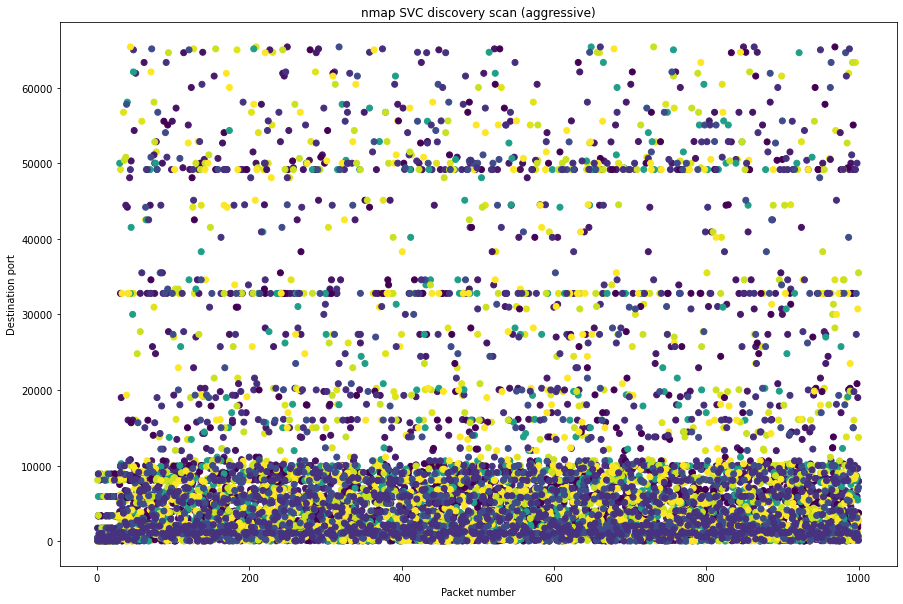

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

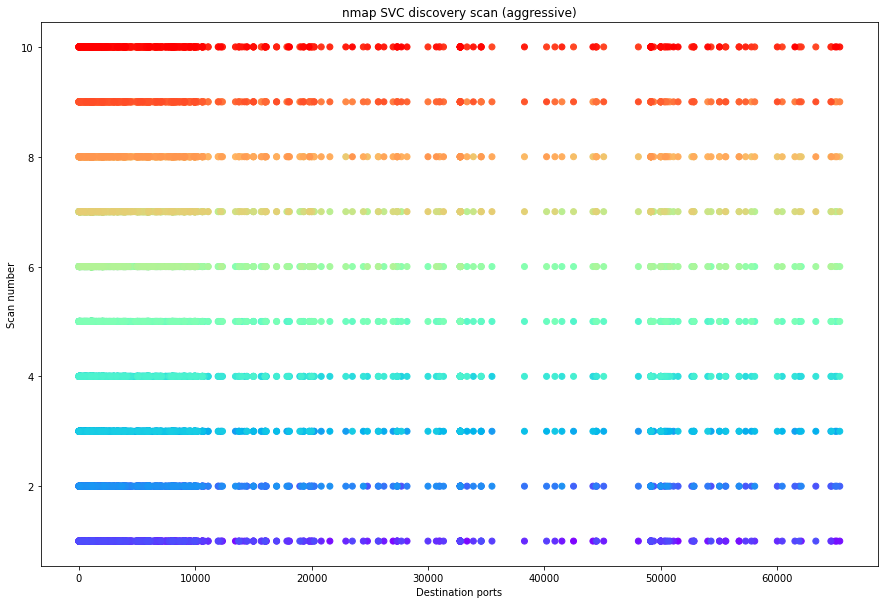

In [19]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [20]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

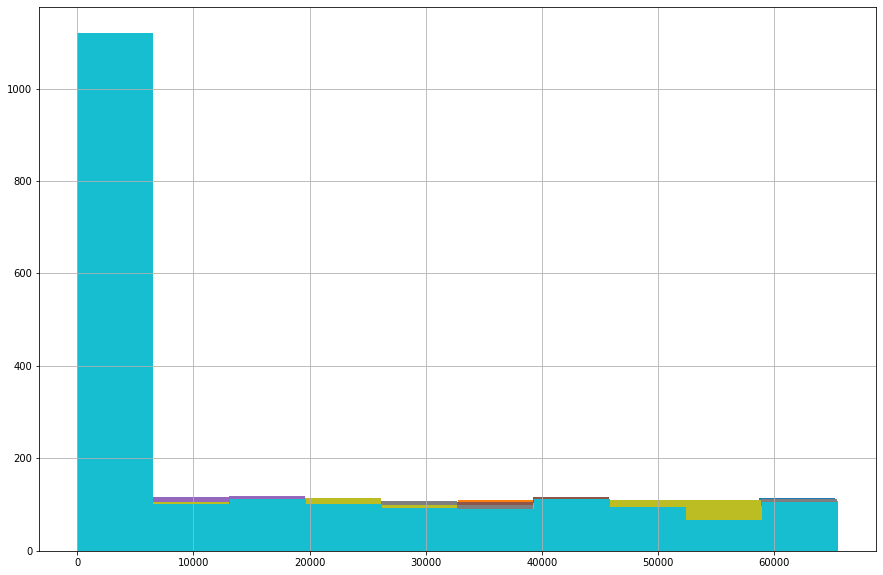

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

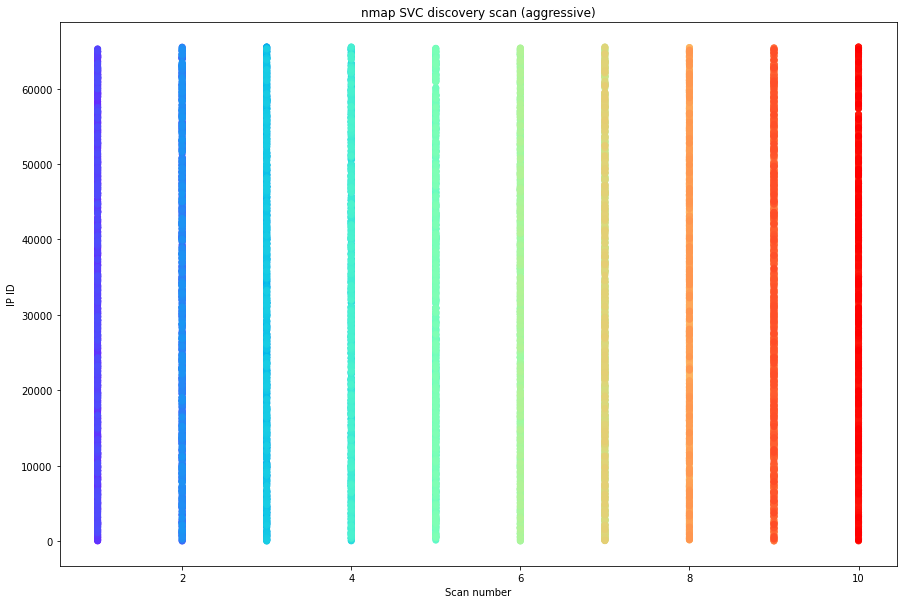

In [25]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


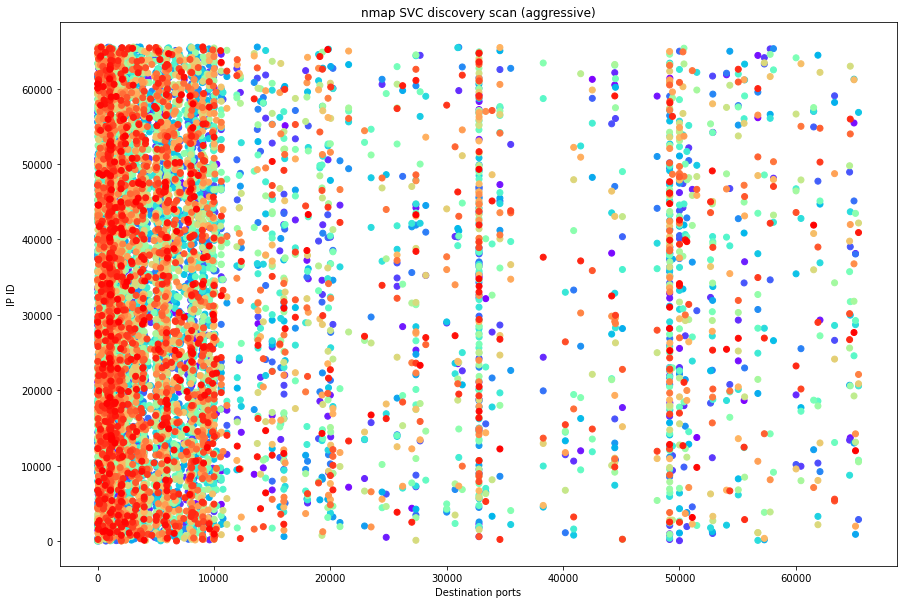

In [26]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

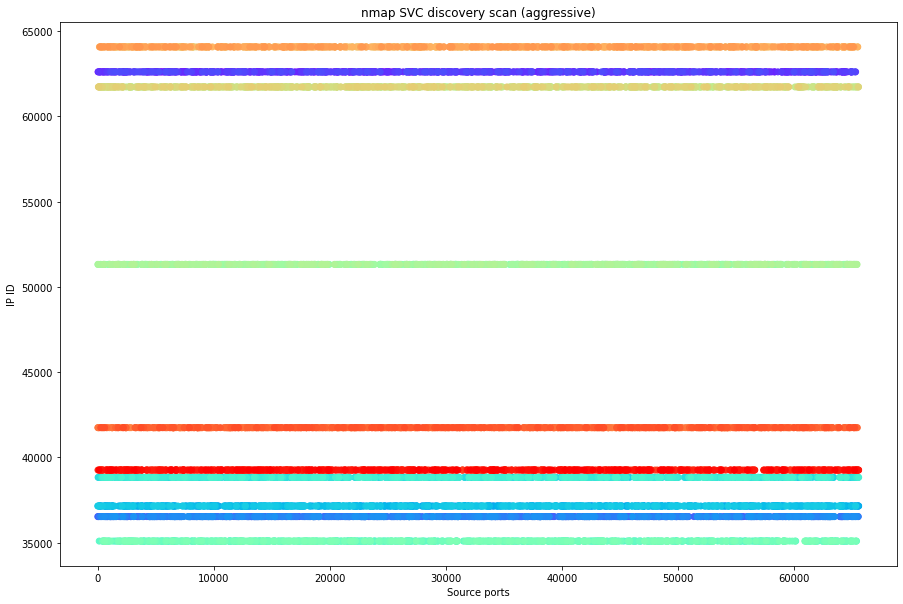

In [37]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x
if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 2165173804
Sequence number: 216

Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence num

Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence number: 38270080
Sequence num

Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 2045226453
Sequence number: 204

Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 3705864621
Sequence number: 370

Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 181

Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 1812043519
Sequence number: 181

Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence number: 94982080
Sequence num

Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 1371795455
Sequence number: 137

Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 294

Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 2940559818
Sequence number: 294

Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 3727900038
Sequence number: 372

Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 3656750941
Sequence number: 365

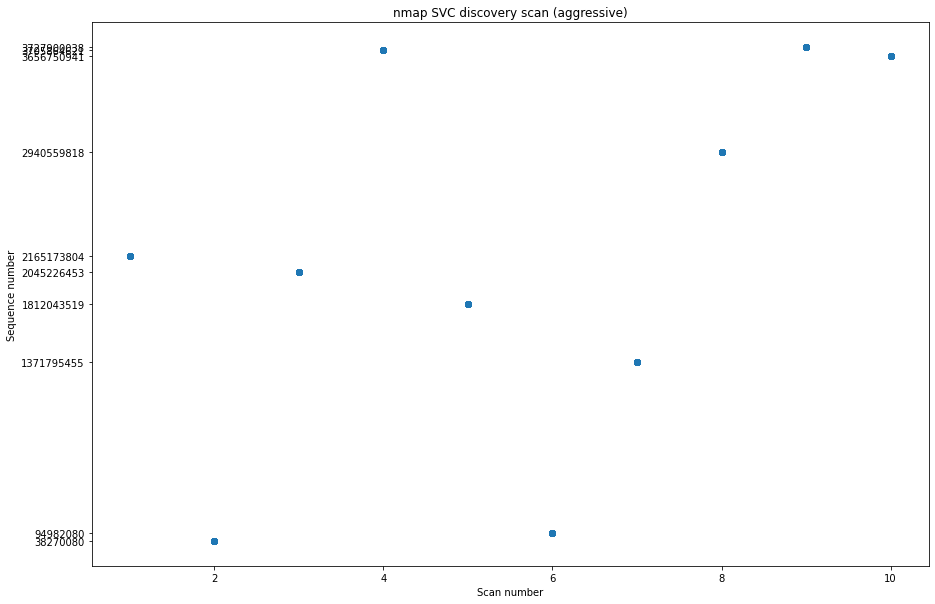

In [31]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


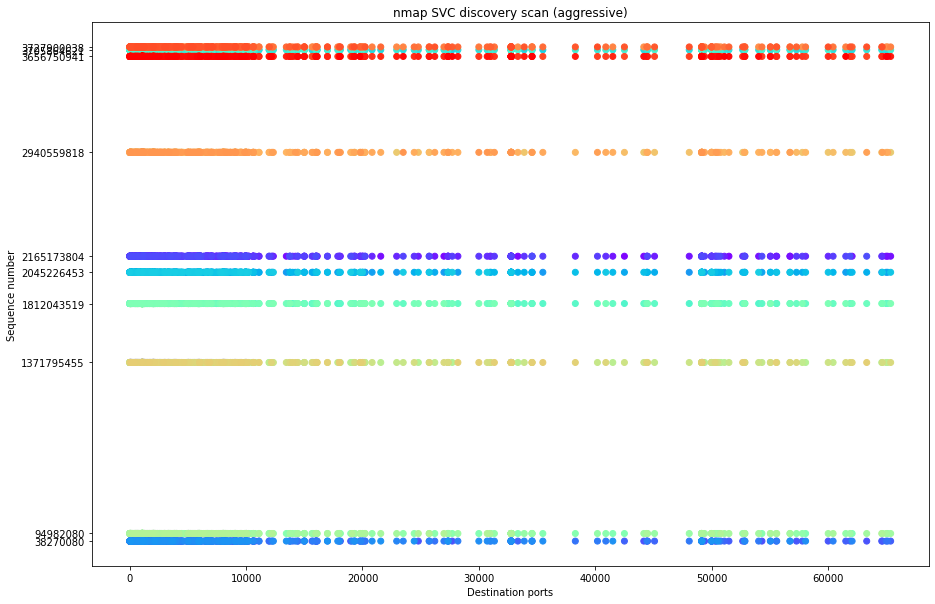

In [32]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

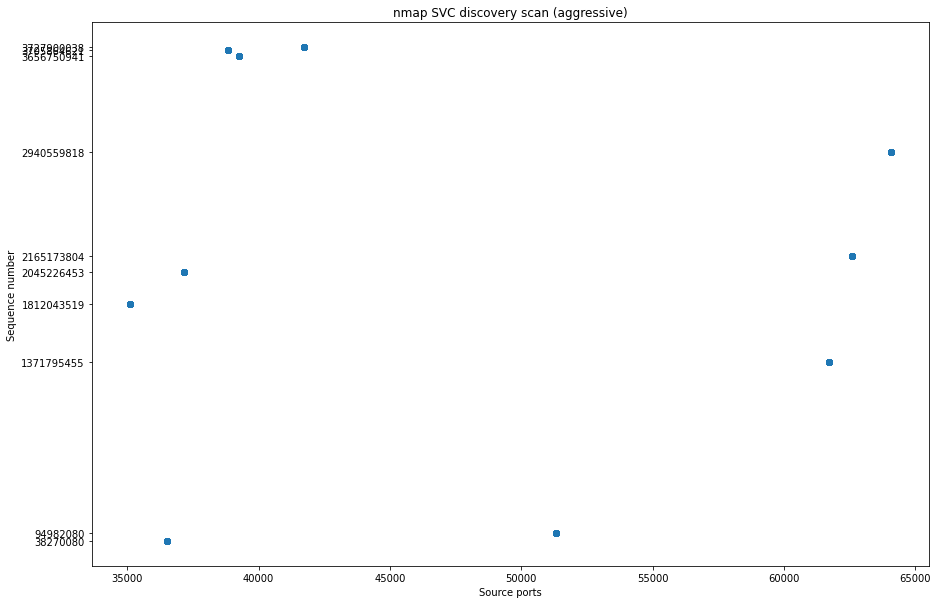

In [33]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [36]:
len(set(orders_port['sport']))

10

## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F